### Answers to Assignment 6 of 230E

##### Authors(alphabetic order)
1) Ishan Pathak ishan_pathak@berkeley.edu
2) Leonid Maksymenko leo.maksymenko@berkeley.edu
3) Nymph Qiu nymph_qiu@berkeley.edu
4) Xuanzhong Ren rxz19@berkeley.edu

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf

### Q1

Our answers are based on percentage scale for volatility e.g. 16 refers to 16% of vol.

In [173]:
import yfinance as yf
sp500 = yf.download(['^GSPC'], start='1970-1-1', end='2024-4-26', progress=False)
ge = yf.download(['GE'], start='1970-1-1', end='2024-4-26', progress=False)
daily_sp500 = sp500['Adj Close'].resample('B').last().apply(np.log).diff().dropna().apply(lambda x: 100*x)
monthly_sp500 = sp500['Adj Close'].resample('ME').last().apply(np.log).diff().dropna().apply(lambda x: 100*x)
yearly_sp500 = sp500['Adj Close'].resample('YE').last().apply(np.log).diff().dropna().apply(lambda x: 100*x)
daily_ge = ge['Adj Close'].resample('B').last().apply(np.log).diff().dropna().apply(lambda x: 100*x)
monthly_ge = ge['Adj Close'].resample('ME').last().apply(np.log).diff().dropna().apply(lambda x: 100*x)
yearly_ge = ge['Adj Close'].resample('YE').last().apply(np.log).diff().dropna().apply(lambda x: 100*x)

(a)

In [174]:
def calc_acf(data, nlags=5):
    output = [1]
    for i in range(nlags):
        output.append(np.corrcoef(daily_sp500.iloc[(i+1):], daily_sp500.iloc[:-(i+1)])[1,0])
    return output

In [175]:
print("ACF for daily log return of S&P500")
print(list(calc_acf(daily_sp500, nlags=5)))
print()
print("ACF for monthly log return of S&P500")
print(list(calc_acf(monthly_sp500, nlags=5)))
print()
print("ACF for yearly log return of S&P500")
print(list(calc_acf(yearly_sp500, nlags=5)))
print()
print("ACF for daily log return of GE")
print(list(calc_acf(daily_ge, nlags=5)))
print()
print("ACF for monthly log return of GE")
print(list(calc_acf(monthly_ge, nlags=5)))
print()
print("ACF for yearly log return of GE")
print(list(calc_acf(yearly_ge, nlags=5)))
print()

ACF for daily log return of S&P500
[1, -0.019633482283878404, -0.01030506121611885, -0.010535552328896953, -0.028245099496989494, 0.004521259684043166]

ACF for monthly log return of S&P500
[1, -0.019633482283878404, -0.01030506121611885, -0.010535552328896953, -0.028245099496989494, 0.004521259684043166]

ACF for yearly log return of S&P500
[1, -0.019633482283878404, -0.01030506121611885, -0.010535552328896953, -0.028245099496989494, 0.004521259684043166]

ACF for daily log return of GE
[1, -0.019633482283878404, -0.01030506121611885, -0.010535552328896953, -0.028245099496989494, 0.004521259684043166]

ACF for monthly log return of GE
[1, -0.019633482283878404, -0.01030506121611885, -0.010535552328896953, -0.028245099496989494, 0.004521259684043166]

ACF for yearly log return of GE
[1, -0.019633482283878404, -0.01030506121611885, -0.010535552328896953, -0.028245099496989494, 0.004521259684043166]



(b)

In [176]:
def annualized_vol(data, freq, total_freq):
    prep = data.apply(np.square).resample(freq).count().reset_index().rename(columns={"Adj Close": "count"}).merge(data.apply(np.square).resample(freq).sum().reset_index().rename(columns={"Adj Close": "variance"}), on="Date")
    prep.loc[prep.index, "annualized_var"] = prep.apply(lambda x: x["variance"]/x["count"]*total_freq,axis=1)
    return np.sqrt(np.mean(prep["annualized_var"]))

In [177]:
annualized_vol(daily_sp500, freq="YE", total_freq=252)

17.163728450904124

In [178]:
annualized_vol(monthly_sp500, freq="YE", total_freq=12)

15.553748409936736

In [179]:
annualized_vol(yearly_sp500, freq="YE", total_freq=1)

18.173014919438224

In [180]:
annualized_vol(daily_ge, freq="YE", total_freq=252)

28.370202838262585

In [181]:
annualized_vol(monthly_ge, freq="YE", total_freq=12)

26.89529050910573

In [182]:
annualized_vol(yearly_ge, freq="YE", total_freq=1)

31.69511000536563

The average vol differs because of frequencies. Like daily vol to constitute annualized vol would contain daily noises while monthly contains monthly noises. This would impact the final estimation of annualized vol.

(c)

In [183]:
def monthly_vol(data, freq, total_freq):
    prep = data.apply(np.square).resample(freq).count().reset_index().rename(columns={"Adj Close": "count"}).merge(data.apply(np.square).resample(freq).sum().reset_index().rename(columns={"Adj Close": "variance"}), on="Date")
    prep.loc[prep.index, "monthly_vol"] = prep.apply(lambda x: np.sqrt(x["variance"]/x["count"]*total_freq),axis=1)
    return prep

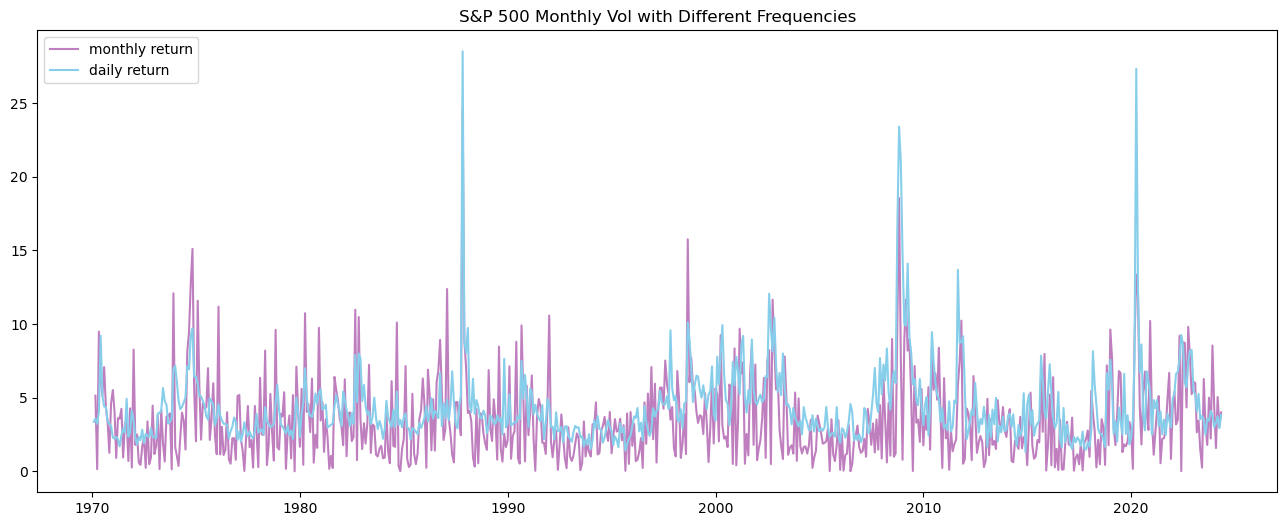

S&P500: Mean for monthly vol by daily return
4.345789932761735

S&P500: Mean for monthly vol by monthly return
3.4402225403537368

S&P500: Cov of monthly vol between monthly and daily returns
[[8.40874899 4.1219943 ]
 [4.1219943  6.75757107]]

S&P500: Corr of monthly vol between monthly and daily returns
[[1.         0.54682251]
 [0.54682251 1.        ]]



In [184]:
# S&P500
month_vol_daily_sp500 = monthly_vol(daily_sp500, freq="ME", total_freq=22)["monthly_vol"]
month_vol_monthly_sp500 = monthly_vol(monthly_sp500, freq="ME", total_freq=1)["monthly_vol"]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
axes.plot(monthly_vol(monthly_sp500, freq="ME", total_freq=1)["Date"], month_vol_monthly_sp500, color ='purple',alpha=0.5, label="monthly return")
axes.plot(monthly_vol(daily_sp500, freq="ME", total_freq=22)["Date"], month_vol_daily_sp500, color ='skyblue',label="daily return")
axes.legend()
axes.set_title("S&P 500 Monthly Vol with Different Frequencies")
plt.show()
print("S&P500: Mean for monthly vol by daily return")
print(np.mean(month_vol_daily_sp500))
print()
print("S&P500: Mean for monthly vol by monthly return")
print(np.mean(month_vol_monthly_sp500))
print()
print("S&P500: Cov of monthly vol between monthly and daily returns")
print(np.cov(np.array([list(month_vol_monthly_sp500), list(month_vol_daily_sp500.iloc[1:])])))
print()
print("S&P500: Corr of monthly vol between monthly and daily returns")
print(np.corrcoef(np.array([list(month_vol_monthly_sp500), list(month_vol_daily_sp500.iloc[1:])])))
print()

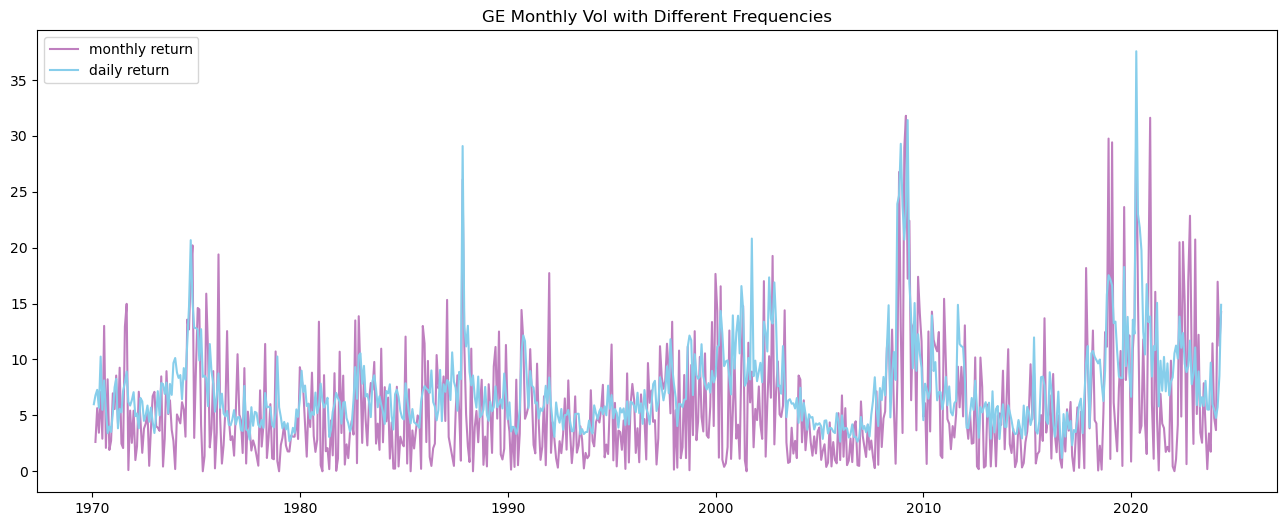

GE: Mean for monthly vol by daily return
7.340031457906872

GE: Mean for monthly vol by monthly return
5.6187943184450635

GE: Cov of monthly vol between monthly and daily returns
[[27.59099454 11.79564403]
 [11.79564403 16.14385163]]

GE: Corr of monthly vol between monthly and daily returns
[[1.         0.55890038]
 [0.55890038 1.        ]]



In [185]:
# GE
month_vol_daily_ge = monthly_vol(daily_ge, freq="ME", total_freq=22)["monthly_vol"]
month_vol_monthly_ge = monthly_vol(monthly_ge, freq="ME", total_freq=1)["monthly_vol"]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
axes.plot(monthly_vol(monthly_ge, freq="ME", total_freq=1)["Date"], month_vol_monthly_ge, color ='purple',alpha=0.5, label="monthly return")
axes.plot(monthly_vol(daily_ge, freq="ME", total_freq=22)["Date"], month_vol_daily_ge, color ='skyblue',label="daily return")
axes.legend()
axes.set_title("GE Monthly Vol with Different Frequencies")
plt.show()
print("GE: Mean for monthly vol by daily return")
print(np.mean(month_vol_daily_ge))
print()
print("GE: Mean for monthly vol by monthly return")
print(np.mean(month_vol_monthly_ge))
print()
print("GE: Cov of monthly vol between monthly and daily returns")
print(np.cov(np.array([list(month_vol_monthly_ge), list(month_vol_daily_ge.iloc[1:])])))
print()
print("GE: Corr of monthly vol between monthly and daily returns")
print(np.corrcoef(np.array([list(month_vol_monthly_ge), list(month_vol_daily_ge.iloc[1:])])))
print()

(d)

In [186]:
sp500_monthly_vol_data = monthly_vol(daily_sp500, freq="ME", total_freq=22)["monthly_vol"]
mod_sp500 = sm.tsa.arima.ARIMA(sp500_monthly_vol_data, order=(1, 0, 0))
res_sp500 = mod_sp500.fit()
print(res_sp500.summary())

                               SARIMAX Results                                
Dep. Variable:            monthly_vol   No. Observations:                  652
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1395.153
Date:                Fri, 26 Apr 2024   AIC                           2796.306
Time:                        11:38:09   BIC                           2809.746
Sample:                             0   HQIC                          2801.518
                                - 652                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3422      0.328     13.234      0.000       3.699       4.985
ar.L1          0.6099      0.014     43.208      0.000       0.582       0.638
sigma2         4.2250      0.068     62.293      0.0

In [187]:
ge_monthly_vol_data = monthly_vol(daily_ge, freq="ME", total_freq=22)["monthly_vol"]
mod_ge = sm.tsa.arima.ARIMA(ge_monthly_vol_data, order=(1, 0, 0))
res_ge = mod_ge.fit()
print(res_ge.summary())

                               SARIMAX Results                                
Dep. Variable:            monthly_vol   No. Observations:                  652
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1606.809
Date:                Fri, 26 Apr 2024   AIC                           3219.618
Time:                        11:38:10   BIC                           3233.058
Sample:                             0   HQIC                          3224.830
                                - 652                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3628      0.530     13.894      0.000       6.324       8.401
ar.L1          0.7064      0.018     39.161      0.000       0.671       0.742
sigma2         8.0843      0.173     46.843      0.0

We could see that AR term coefficient is significant which implies strong auto correlation of monthly volatility at lag=1. 

(e)

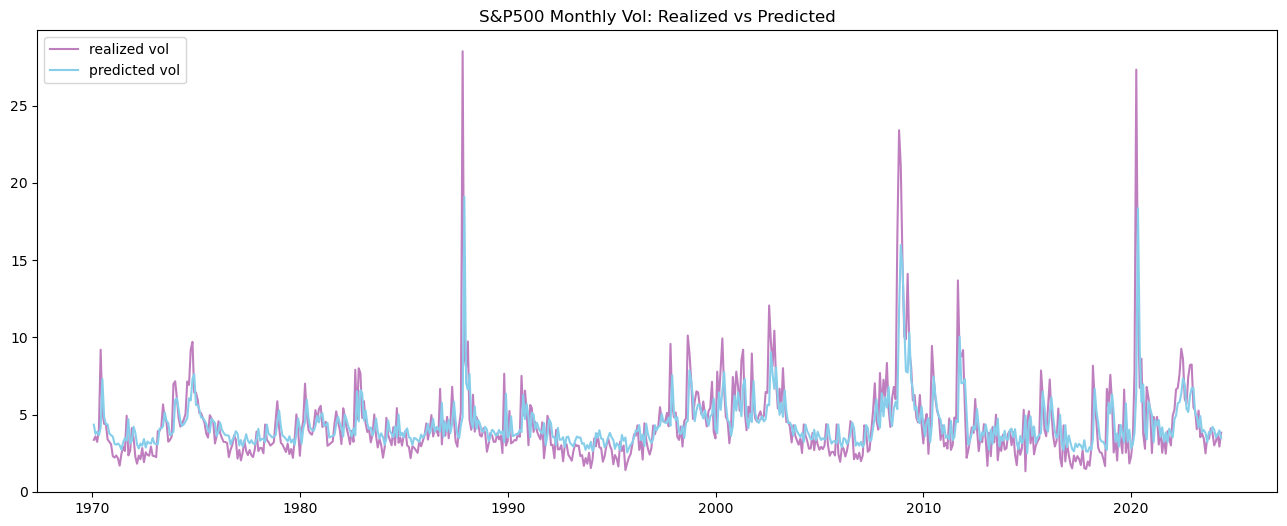

In [188]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
axes.plot(monthly_vol(daily_sp500, freq="ME", total_freq=22)["Date"], month_vol_daily_sp500, color ='purple',alpha=0.5, label="realized vol")
axes.plot(monthly_vol(daily_sp500, freq="ME", total_freq=22)["Date"], res_sp500.predict(), color ='skyblue',label="predicted vol")
axes.legend()
axes.set_title("S&P500 Monthly Vol: Realized vs Predicted")
plt.show()

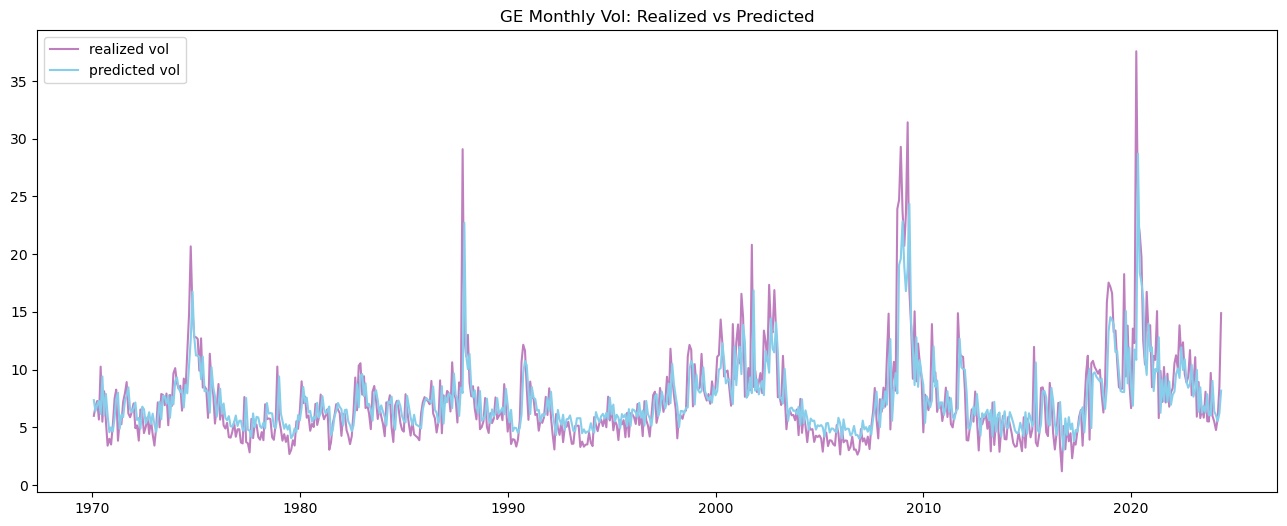

In [189]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
axes.plot(monthly_vol(daily_ge, freq="ME", total_freq=22)["Date"], month_vol_daily_ge, color ='purple',alpha=0.5, label="realized vol")
axes.plot(monthly_vol(daily_ge, freq="ME", total_freq=22)["Date"], res_ge.predict(), color ='skyblue',label="predicted vol")
axes.legend()
axes.set_title("GE Monthly Vol: Realized vs Predicted")
plt.show()

(f)

In [190]:
print("MSE for S&P500 Monthly Vol:", np.mean((res_sp500.predict()-month_vol_daily_sp500)**2))

MSE for S&P500 Monthly Vol: 4.2255579219956205


In [191]:
print("MSE for GE Monthly Vol:", np.mean((res_ge.predict()-month_vol_daily_ge)**2))

MSE for GE Monthly Vol: 8.085727796013499


### Q2

(a)

In [192]:
from arch import arch_model
garch_model_sp500 = arch_model(monthly_sp500, vol='GARCH', p=1, q=1)
garch_result_sp500 = garch_model_sp500.fit()
print(garch_result_sp500.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 31491.64433375038
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1913.5577993270153
Iteration:      3,   Func. Count:     20,   Neg. LLF: 1902.4005103337813
Iteration:      4,   Func. Count:     27,   Neg. LLF: 1873.0316579063435
Iteration:      5,   Func. Count:     33,   Neg. LLF: 1886.956554977848
Iteration:      6,   Func. Count:     39,   Neg. LLF: 1871.2125503055775
Iteration:      7,   Func. Count:     45,   Neg. LLF: 1870.9612001460903
Iteration:      8,   Func. Count:     50,   Neg. LLF: 1870.953926308735
Iteration:      9,   Func. Count:     55,   Neg. LLF: 1870.9537924313559
Iteration:     10,   Func. Count:     60,   Neg. LLF: 1870.953754536119
Iteration:     11,   Func. Count:     65,   Neg. LLF: 1870.9537542189144
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1870.9537542189144
            Iterations: 11
            Function evaluations: 65
            Gradient evaluat

In [193]:
garch_model_ge = arch_model(monthly_ge, vol='GARCH', p=1, q=1)
garch_result_ge = garch_model_ge.fit()
print(garch_result_ge.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2882.5113970746534
Iteration:      2,   Func. Count:     13,   Neg. LLF: 3572.198163949044
Iteration:      3,   Func. Count:     20,   Neg. LLF: 2215.1385050128183
Iteration:      4,   Func. Count:     26,   Neg. LLF: 2305.111176576742
Iteration:      5,   Func. Count:     33,   Neg. LLF: 2198.471226412441
Iteration:      6,   Func. Count:     39,   Neg. LLF: 2190.4052067922375
Iteration:      7,   Func. Count:     44,   Neg. LLF: 2190.4026103931224
Iteration:      8,   Func. Count:     49,   Neg. LLF: 2190.4025433288634
Iteration:      9,   Func. Count:     54,   Neg. LLF: 2190.402542396383
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2190.402542396383
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:           

For both S&P500 and GE, $\alpha+\beta < 1$ this suggests that $\sigma_t^2$ is stationary.<br>
Besides, both $\alpha$ and $\beta $ are significant for both equities.

(b)

Regression of realized vol over GARCH conditional vol for GE
                                 OLS Regression Results                                
Dep. Variable:                    h.1   R-squared (uncentered):                   0.522
Model:                            OLS   Adj. R-squared (uncentered):              0.521
Method:                 Least Squares   F-statistic:                              688.3
Date:                Fri, 26 Apr 2024   Prob (F-statistic):                   4.29e-103
Time:                        12:25:00   Log-Likelihood:                         -1943.1
No. Observations:                 631   AIC:                                      3888.
Df Residuals:                     630   BIC:                                      3893.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|     

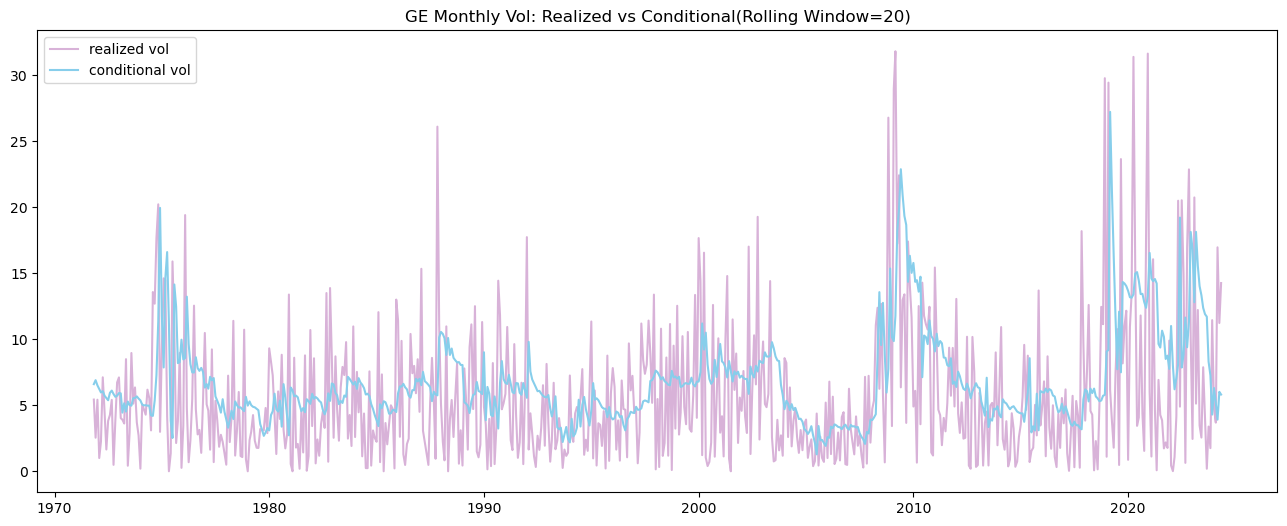

In [246]:
index = monthly_ge.index
start_loc = 0
end_loc = 20
forecasts = {}
garch_model_ge = arch_model(monthly_ge, vol='GARCH', p=1, q=1)
for i in range(len(monthly_ge)-end_loc):
    res = garch_model_ge.fit(first_obs=i, last_obs=i + end_loc, disp="off")
    temp = res.forecast(horizon=1).variance
    fcast = temp.iloc[0]
    forecasts[fcast.name] = fcast
ge_garch_forecast = pd.DataFrame(forecasts).T.apply(np.sqrt)
print("Regression of realized vol over GARCH conditional vol for GE")
ge_garch_forecast.index = monthly_ge.apply(abs).iloc[end_loc:].index
ge_ols_model = sm.OLS(ge_garch_forecast, monthly_ge.apply(abs).iloc[end_loc:])
print(ge_ols_model.fit().summary())
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
axes.plot(monthly_ge.apply(abs).iloc[end_loc:].index, monthly_ge.apply(abs).iloc[end_loc:], color ='purple',alpha=0.3, label="realized vol")
axes.plot(monthly_ge.apply(abs).iloc[end_loc:].index, ge_garch_forecast, color ='skyblue',label="conditional vol")
axes.legend()
axes.set_title("GE Monthly Vol: Realized vs Conditional(Rolling Window=20)")
plt.show()

Regression of realized vol over GARCH conditional vol for S&P 500
                                 OLS Regression Results                                
Dep. Variable:                    h.1   R-squared (uncentered):                   0.567
Model:                            OLS   Adj. R-squared (uncentered):              0.566
Method:                 Least Squares   F-statistic:                              823.4
Date:                Fri, 26 Apr 2024   Prob (F-statistic):                   1.84e-116
Time:                        12:25:07   Log-Likelihood:                         -1569.3
No. Observations:                 631   AIC:                                      3141.
Df Residuals:                     630   BIC:                                      3145.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|

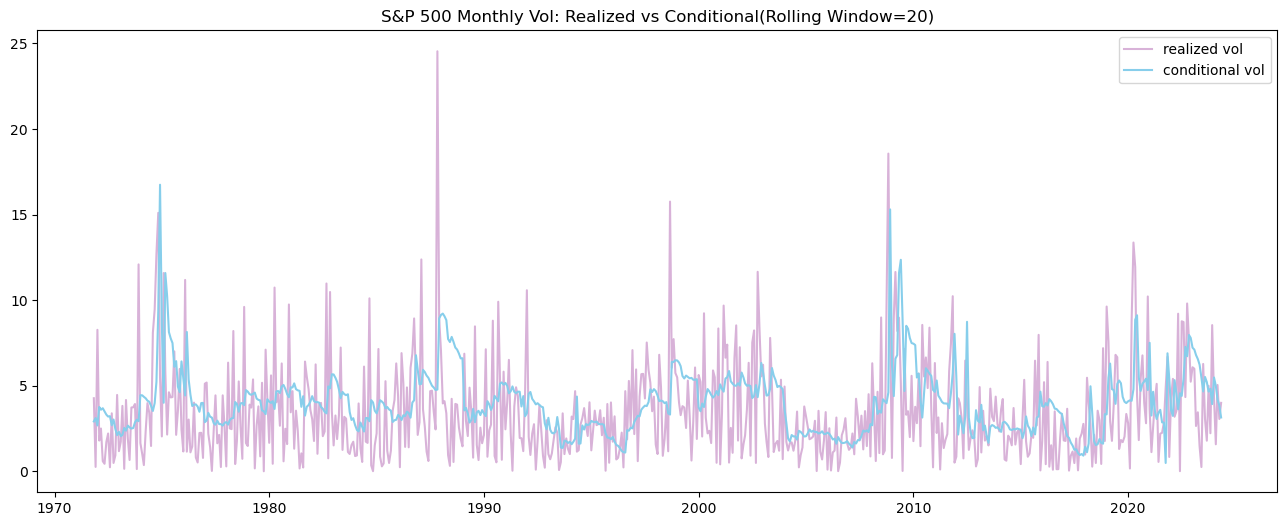

In [247]:
index = monthly_sp500.index
start_loc = 0
end_loc = 20
forecasts = {}
garch_model_sp500 = arch_model(monthly_sp500, vol='GARCH', p=1, q=1)
for i in range(len(monthly_sp500)-end_loc):
    res = garch_model_sp500.fit(first_obs=i, last_obs=i + end_loc, disp="off")
    temp = res.forecast(horizon=1).variance
    fcast = temp.iloc[0]
    forecasts[fcast.name] = fcast
sp500_garch_forecast = pd.DataFrame(forecasts).T.apply(np.sqrt)
print("Regression of realized vol over GARCH conditional vol for S&P 500")
sp500_garch_forecast.index = monthly_sp500.apply(abs).iloc[end_loc:].index
sp500_ols_model = sm.OLS(sp500_garch_forecast, monthly_sp500.apply(abs).iloc[end_loc:])
print(sp500_ols_model.fit().summary())
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
axes.plot(monthly_sp500.apply(abs).iloc[end_loc:].index, monthly_sp500.apply(abs).iloc[end_loc:], color ='purple',alpha=0.3, label="realized vol")
axes.plot(monthly_sp500.apply(abs).iloc[end_loc:].index, sp500_garch_forecast, color ='skyblue',label="conditional vol")
axes.legend()
axes.set_title("S&P 500 Monthly Vol: Realized vs Conditional(Rolling Window=20)")
plt.show()

(c)

In [237]:
print("RMSE for S&P500:", np.sqrt(np.mean((np.array(sp500_garch_forecast).reshape((len(sp500_garch_forecast))) - np.array(monthly_sp500.apply(abs).iloc[end_loc:]))**2)))

RMSE for S&P500: 3.13684572172672


In [238]:
print("RMSE for GE:", np.sqrt(np.mean((np.array(ge_garch_forecast).reshape((len(ge_garch_forecast))) - np.array(monthly_ge.apply(abs).iloc[end_loc:]))**2)))

RMSE for GE: 5.705571089531858


(d)

In [241]:
for p in range(3):
    for q in range(3):
        start_loc = 0
        end_loc = 20
        forecasts = {}
        garch_model_sp500 = arch_model(monthly_sp500, vol='GARCH', p=p+1, q=q+1)
        for i in range(len(monthly_sp500)-end_loc):
            res = garch_model_sp500.fit(first_obs=i, last_obs=i + end_loc, disp="off")
            temp = res.forecast(horizon=1).variance
            fcast = temp.iloc[0]
            forecasts[fcast.name] = fcast
        sp500_garch_forecast = pd.DataFrame(forecasts).T.apply(np.sqrt)
        print(f"p={p+1}, q={q+1}:",np.sqrt(np.mean((np.array(sp500_garch_forecast).reshape((len(sp500_garch_forecast))) - np.array(monthly_sp500.apply(abs).iloc[end_loc:]))**2)))

p=1, q=1: 3.13684572172672
p=1, q=2: 3.118033083261487
p=1, q=3: 3.1170317030538173
p=2, q=1: 3.2288518313402457
p=2, q=2: 3.2454618533847928
p=2, q=3: 3.235479671568594
p=3, q=1: 3.2601688819778216
p=3, q=2: 3.3510088037076384
p=3, q=3: 3.265041289746786


In [242]:
for p in range(3):
    for q in range(3):
        start_loc = 0
        end_loc = 20
        forecasts = {}
        garch_model_ge = arch_model(monthly_ge, vol='GARCH', p=p+1, q=q+1)
        for i in range(len(monthly_ge)-end_loc):
            res = garch_model_ge.fit(first_obs=i, last_obs=i + end_loc, disp="off")
            temp = res.forecast(horizon=1).variance
            fcast = temp.iloc[0]
            forecasts[fcast.name] = fcast
        ge_garch_forecast = pd.DataFrame(forecasts).T.apply(np.sqrt)
        print(f"p={p+1}, q={q+1}:",np.sqrt(np.mean((np.array(ge_garch_forecast).reshape((len(ge_garch_forecast))) - np.array(monthly_ge.apply(abs).iloc[end_loc:]))**2)))

p=1, q=1: 5.705571089531858
p=1, q=2: 5.537592646245217
p=1, q=3: 5.587643137776384
p=2, q=1: 5.797146467199956
p=2, q=2: 5.8198854671886755
p=2, q=3: 5.866850854789912
p=3, q=1: 5.81860490429048
p=3, q=2: 5.904495345203206


/Users/nymphqiu/anaconda3/envs/mfe230e/lib/python3.11/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


p=3, q=3: 5.897430623678315


We could see that GARCH(1,2) model is good for both GE and S&P given RMSE is relatively small and number of variables in the model is small.